In [152]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [153]:
# from google.colab import drive
# drive.mount('/content/drive')

In [154]:
unclean = 'heart.csv'
data = pd.read_csv(unclean) # for model development
dt = pd.read_csv(unclean) #for analysis

# Explotary Data Analysis

> Getting information on data

In [155]:
dt.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


> Dataset Attributes
* Age : age of the patient [years]
* Sex : sex of the patient [M: Male, F: Female]
* ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP : resting blood pressure [mm Hg]
* Cholesterol : serum cholesterol [mm/dl]
* FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina : exercise-induced angina [Y: Yes, N: No]
* Oldpeak : oldpeak = ST [Numeric value measured in depression]
* ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease : output class [1: heart disease, 0: Normal]




In [156]:
# getting data info
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [157]:
dt.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [158]:
# check if data is equally balnced between target variable
dt['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64



> Data is evenly distributed between target variable



In [159]:
# dividing feature into numerical and categorical for better analysis
categorical_features = []
numerical_features = []

for column in dt:
    if column == 'HeartDisease':
      continue
    if dt[column].nunique() >= 5:
        numerical_features.append(column)
    else:
        categorical_features.append(column)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


> Analysis on catagorical features

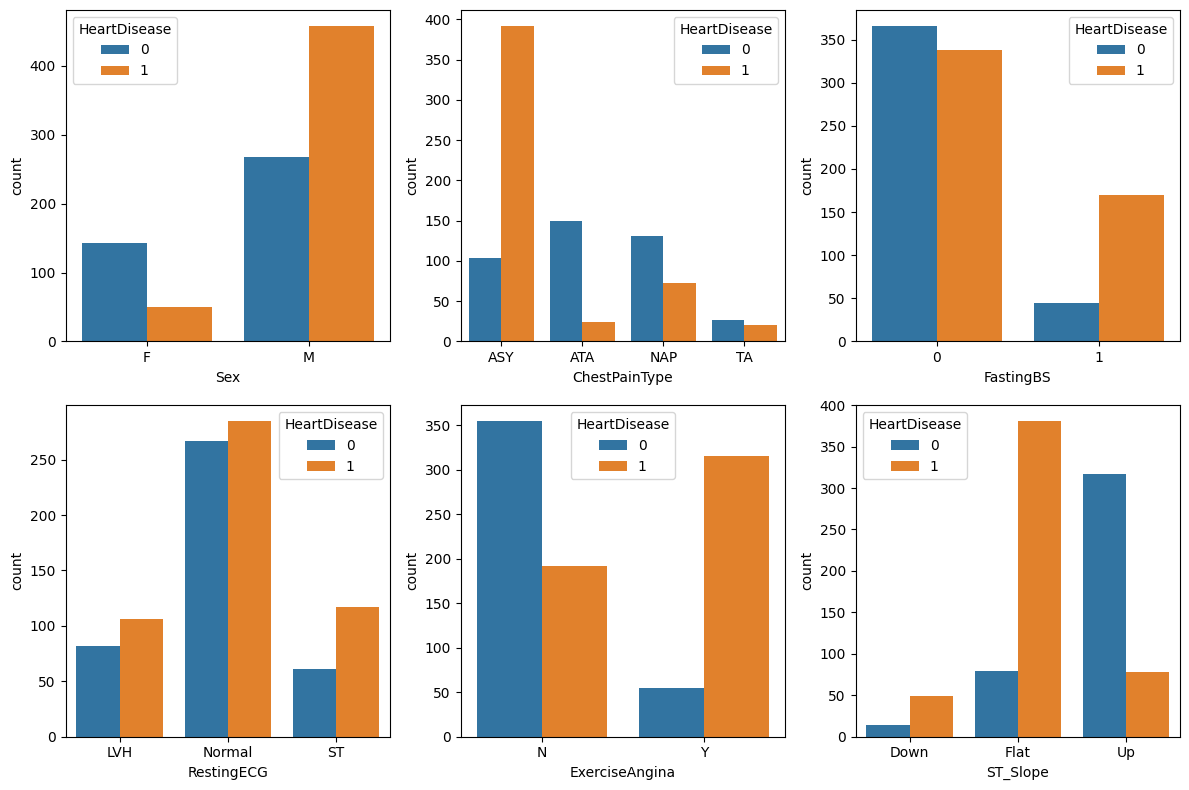

In [160]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    dt[feature] = dt[feature].astype('category')
    sns.countplot(data=dt, x=feature, hue='HeartDisease', ax=ax)
    # ax.set_title(categorical_features[i])

plt.tight_layout()
plt.show()

> Order of features for cases of heart disease: 
* Sex : Male > Female
* ChestPainType : ASY > NAP > ATA > TA
* FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
* RestingECG : Normal > ST > LVH
* ExerciseAngina : Angina > No Angina
* ST_Slope : Flat > Up > Down



> Analysis of numerical feature

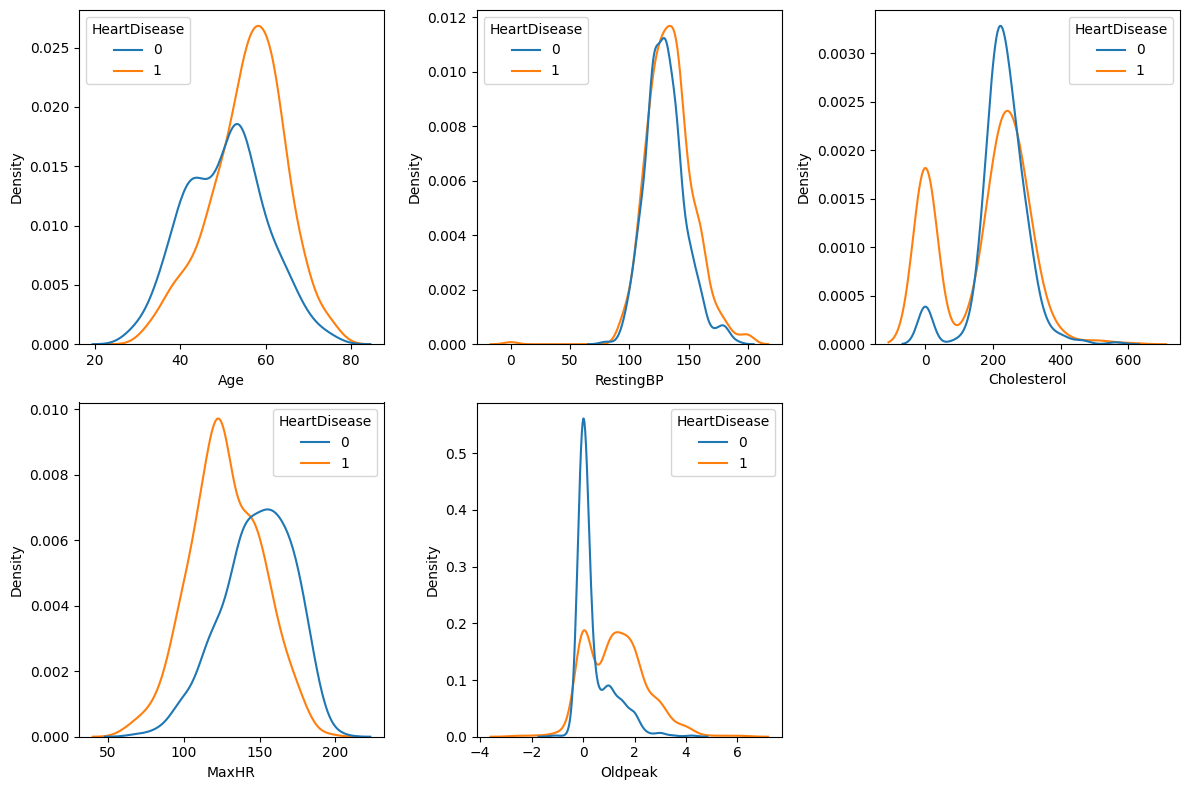

In [161]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.kdeplot(data=dt, x=feature, hue='HeartDisease', ax=ax)

fig.delaxes(axes[1,2])
plt.tight_layout()
plt.show()


> It looks like the Cholesterol feature contains some outliers, after some reaserch it is not possible for a patients serum cholesterol to be zero so we have to handle the outliers

In [162]:
# replace zero value with Nan
dt['Cholesterol'] = dt['Cholesterol'].replace(0, np.nan)

# Replace the NaN values in Cholesterol with the average value
average_chol = dt['Cholesterol'].mean()
dt['Cholesterol'] = dt['Cholesterol'].fillna(average_chol)

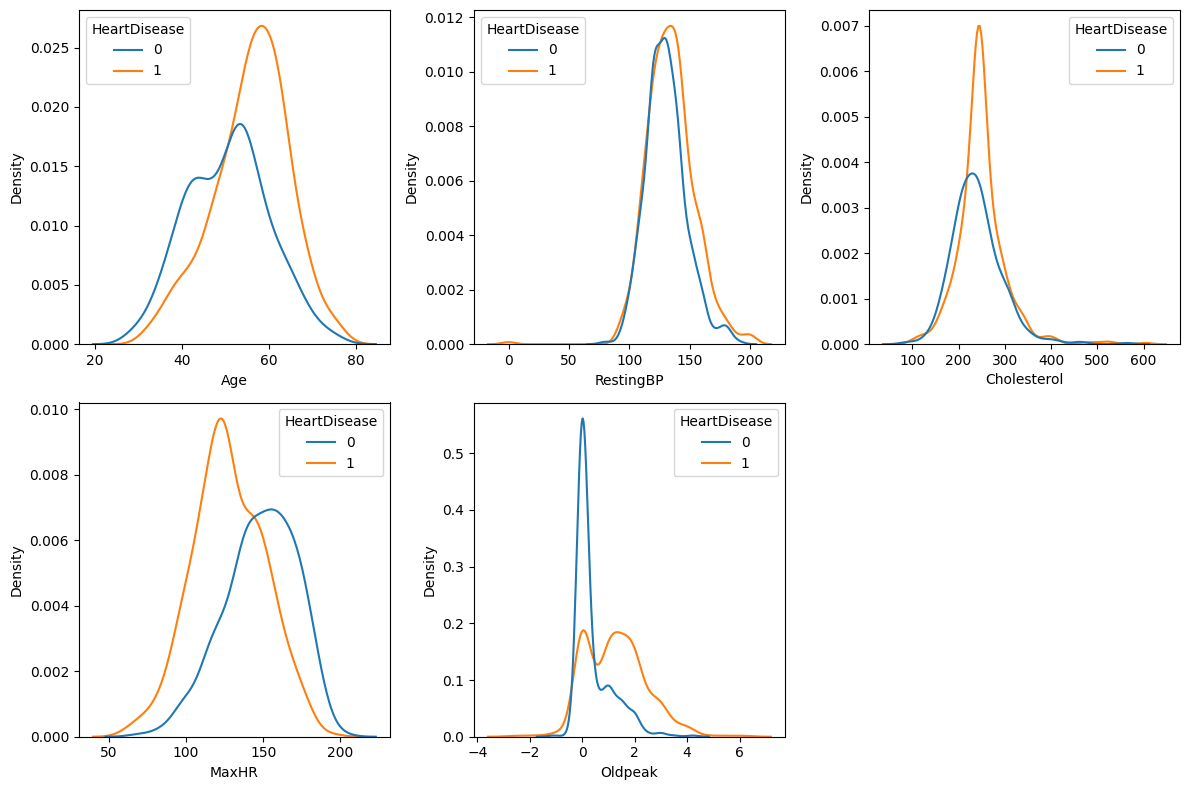

In [163]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.kdeplot(data=dt, x=feature, hue='HeartDisease', ax=ax)

fig.delaxes(axes[1,2])
plt.tight_layout()
plt.show()


> Range of features for cases of heart disease:
* Age : 50+
* RestingBP : 95 - 170
* Cholesterol : 160 - 340
* MaxHR : 70 - 180
* Oldpeak : 0 - 4

# Data Preprosessing

In [164]:
unclean = 'heart.csv'
data = pd.read_csv(unclean) # for model development

> Handling outliers in dataset

In [165]:
# replace zero value with Nan
data['Cholesterol'] = data['Cholesterol'].replace(0, np.nan)

# Replace the NaN values in Cholesterol with the average value
average_chol = data['Cholesterol'].mean()
data['Cholesterol'] = data['Cholesterol'].fillna(average_chol)

> converting object type into int type

In [166]:
sex_mapping = {'F': 0, 'M': 1}
chest_pain_mapping = {'TA': 3, 'ATA': 1, 'NAP': 2, 'ASY': 0}
resting_ecg_mapping = {'Normal': 0, 'ST': 1, 'LVH': 2}
exercise_angina_mapping = {'N': 0, 'Y': 1}
st_slope_mapping = {'Up': 2, 'Flat': 1, 'Down': 0}

data['Sex'] = data['Sex'].map(sex_mapping)
data['ChestPainType'] = data['ChestPainType'].map(chest_pain_mapping)
data['RestingECG'] = data['RestingECG'].map(resting_ecg_mapping)
data['ExerciseAngina'] = data['ExerciseAngina'].map(exercise_angina_mapping)
data['ST_Slope'] = data['ST_Slope'].map(st_slope_mapping)

In [167]:
# Display the mapping of original strings to integers
print("String to Integer Mapping:")
mapping_results = {
    'Sex': sex_mapping,
    'ChestPainType': chest_pain_mapping,
    'RestingECG': resting_ecg_mapping,
    'ExerciseAngina': exercise_angina_mapping,
    'ST_Slope': st_slope_mapping
}
for column, mapping in mapping_results.items():
    print(f"{column}:")
    for key, value in mapping.items():
        print(f"  {key} : {value}")
    print()

String to Integer Mapping:
Sex:
  F : 0
  M : 1

ChestPainType:
  TA : 3
  ATA : 1
  NAP : 2
  ASY : 0

RestingECG:
  Normal : 0
  ST : 1
  LVH : 2

ExerciseAngina:
  N : 0
  Y : 1

ST_Slope:
  Up : 2
  Flat : 1
  Down : 0



In [168]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 86.2 KB


In [169]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,0,172,0,0.0,2,0
1,49,0,2,160,180.0,0,0,156,0,1.0,1,1
2,37,1,1,130,283.0,0,1,98,0,0.0,2,0
3,48,0,0,138,214.0,0,0,108,1,1.5,1,1
4,54,1,2,150,195.0,0,0,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264.0,0,0,132,0,1.2,1,1
914,68,1,0,144,193.0,1,0,141,0,3.4,1,1
915,57,1,0,130,131.0,0,0,115,1,1.2,1,1
916,57,0,1,130,236.0,0,2,174,0,0.0,1,1


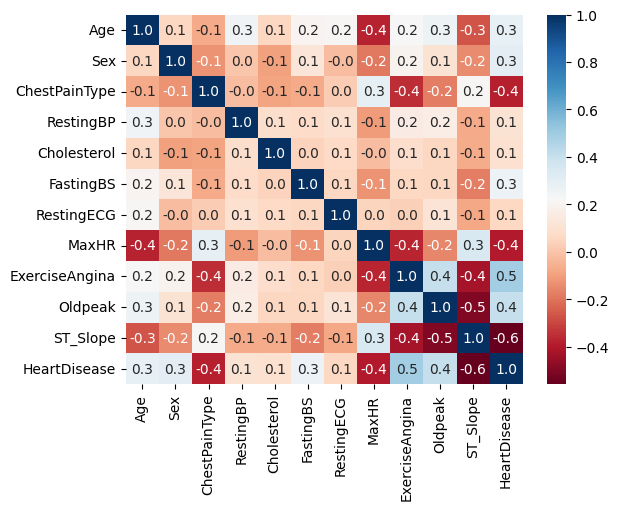

In [170]:
sns.heatmap(data.corr(), cmap= 'RdBu',  annot = True, fmt= ".1f")
plt.show()

> feature with positive correlation
* Age
* Sex
* FastingBS
* ExerciseAngina
* Oldpeak

> features with negative correlation
* ChestPainType
* MaxHR
* ST_Slope

> features with neutral correlation
* RestingECG
* RestingBP
* Cholesterol

As a result of EDA all features are somewhat correlated with the target variable 'HeartDisease' therefore none of the features are removed

# Spliting into train and test

In [171]:
# Split feature and target variable
X = data.drop(columns=['HeartDisease'], axis=1)
y = data['HeartDisease']

In [172]:
# normalizing features
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the features
X_normalized = scaler.fit_transform(X)

In [173]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [174]:
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)

Size of X_train: (734, 11)
Size of X_test: (184, 11)
Size of y_train: (734,)
Size of y_test: (184,)


# Modelling & evaluation

> Evaluation metrics:

* **Accuracy**: The ratio of correctly predicted instance to the total number of instace

* **Precision**: Reperesents the proportion of true positive predictions among all positive predictions made by the model

* **Recall**: Sensitivity or true positive rate

* **F1 score**: The harmonic mean of precision and recall. It provides a balanced measure of the model's accuracy, considering both false positives and false negatives.

* **Confusion Matrix**: A  table that summarizes the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions.



In [175]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [176]:
def cross_validation(model, cv=5, scoring='accuracy'):
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
    
    # Print the cross-validation scores
    print("Cross-Validation Scores:", scores)
    print("Mean", scoring.capitalize() + ":", scores.mean())
    print("Standard Deviation:", scores.std())
    print()

In [177]:
# Method for evaluation
def evaluate(prediction):
  accuracy = accuracy_score(y_test, prediction)
  precision = precision_score(y_test, prediction)
  recall = recall_score(y_test, prediction)
  f1 = f1_score(y_test, prediction)
  cm = confusion_matrix(y_test, prediction)
  false_pred = cm[0,1] + cm[1,0]

  print("Accuracy: ", '{0:.2%}'. format(accuracy))
  print("Precision: ", '{0:.2%}'. format(precision))
  print("Recall: ", '{0:.2%}'. format(recall))
  print("F1: ", '{0:.2%}'. format(f1))
  print("\nConfusion Matrix")
  print(pd.DataFrame(cm, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive']))
  print("\nTotal False Prediction: ", false_pred)

In [178]:
# method to append results in list
evaluation_metrics= []

def store(prediction):
  accuracy = accuracy_score(y_test, prediction)
  precision = precision_score(y_test, prediction)
  recall = recall_score(y_test, prediction)
  f1 = f1_score(y_test, prediction)
  cm = confusion_matrix(y_test, prediction)
  false_pred = cm[0,1] + cm[1,0]

  evaluation = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'False Prediction': false_pred
  }

  return evaluation



> 1) Logistic Regression:

In [179]:
from sklearn.linear_model import LogisticRegression
Model_LR = LogisticRegression(penalty= 'l2', C=10.0, solver='liblinear')

# Perform cross validation
cross_validation(Model_LR)

# Training Logistic Regression 
Model_LR.fit(X_train, y_train)
prediction_LR = Model_LR.predict(X_test)

# Model Evaluation
evaluate(prediction_LR)
evaluation_metrics.append(store(prediction_LR))

Cross-Validation Scores: [0.86394558 0.85034014 0.80952381 0.84353741 0.82876712]
Mean Accuracy: 0.8392228124126362
Standard Deviation: 0.018680353516687762

Accuracy:  85.33%
Precision:  90.82%
Recall:  83.18%
F1:  86.83%

Confusion Matrix
               Predicted Negative  Predicted Positive
True Negative                  68                   9
True Positive                  18                  89

Total False Prediction:  27


> 2) Naive Bayes

In [180]:
from sklearn.naive_bayes import GaussianNB
Model_GSNB = GaussianNB(var_smoothing = 1e-9)

# Perform cross validation
cross_validation(Model_GSNB)

# Training Naive Bayes
Model_GSNB.fit(X_train, y_train)
prediction_GSNB = Model_GSNB.predict(X_test)

# Model Evaluation
evaluate(prediction_GSNB)
evaluation_metrics.append(store(prediction_GSNB))

Cross-Validation Scores: [0.88435374 0.86394558 0.82993197 0.85034014 0.84931507]
Mean Accuracy: 0.8555772994129158
Standard Deviation: 0.018013538814764026

Accuracy:  79.89%
Precision:  88.04%
Recall:  75.70%
F1:  81.41%

Confusion Matrix
               Predicted Negative  Predicted Positive
True Negative                  66                  11
True Positive                  26                  81

Total False Prediction:  37


> 3) Support Vector Machine (SVM)

In [181]:
from sklearn.svm import SVC
Model_SVM = SVC(kernel = 'rbf' , gamma = 0.1 , C=10 , random_state=0)

# Perform cross validation
cross_validation(Model_SVM)

# Training SVM
Model_SVM.fit(X_train, y_train)
prediction_SVM = Model_SVM.predict(X_test)

# Model Evaluation
evaluate(prediction_SVM)
evaluation_metrics.append(store(prediction_SVM))

Cross-Validation Scores: [0.88435374 0.8707483  0.84353741 0.85034014 0.82191781]
Mean Accuracy: 0.8541794800111825
Standard Deviation: 0.021697103063446087

Accuracy:  82.07%
Precision:  87.76%
Recall:  80.37%
F1:  83.90%

Confusion Matrix
               Predicted Negative  Predicted Positive
True Negative                  65                  12
True Positive                  21                  86

Total False Prediction:  33


> 4) Neural Network

In [182]:
from keras.models import Sequential
from keras.layers import Dense
Model_NN = Sequential()
Model_NN.add(Dense(128, activation= 'relu', input_dim= X_train.shape[1]))
Model_NN.add(Dense(64, activation='relu'))
Model_NN.add(Dense(32, activation='relu'))
Model_NN.add(Dense(1, activation='sigmoid'))
Model_NN.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Training NN
Model_NN.fit(X_train, y_train, epochs=50, batch_size=32)
prediction_NN = np.round(Model_NN.predict(X_test))

Epoch 1/50
23/23 [==============================] - 1s 1ms/step - loss: 0.5973 - accuracy: 0.7902
Epoch 2/50
23/23 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8256
Epoch 3/50
23/23 [==============================] - 0s 997us/step - loss: 0.3917 - accuracy: 0.8283
Epoch 4/50
23/23 [==============================] - 0s 929us/step - loss: 0.3715 - accuracy: 0.8460
Epoch 5/50
23/23 [==============================] - 0s 982us/step - loss: 0.3641 - accuracy: 0.8460
Epoch 6/50
23/23 [==============================] - 0s 899us/step - loss: 0.3518 - accuracy: 0.8542
Epoch 7/50
23/23 [==============================] - 0s 880us/step - loss: 0.3490 - accuracy: 0.8624
Epoch 8/50
23/23 [==============================] - 0s 835us/step - loss: 0.3480 - accuracy: 0.8597
Epoch 9/50
23/23 [==============================] - 0s 857us/step - loss: 0.3463 - accuracy: 0.8597
Epoch 10/50
23/23 [==============================] - 0s 841us/step - loss: 0.3415 - accuracy: 0.8610
Epo

In [183]:
# Model Evaluation
evaluate(prediction_NN)
evaluation_metrics.append(store(prediction_NN))

Accuracy:  86.41%
Precision:  91.84%
Recall:  84.11%
F1:  87.80%

Confusion Matrix
               Predicted Negative  Predicted Positive
True Negative                  69                   8
True Positive                  17                  90

Total False Prediction:  25


# Model comparison

In [184]:
models = ['LR', 'NB', 'SVM', 'NN']

evaluation_df = pd.DataFrame(evaluation_metrics)
evaluation_df.insert(0, 'Model', models)

evaluation_df


,Model,Accuracy,Precision,Recall,F1,False Prediction
0,LR,0.853261,0.908163,0.831776,0.868293,27
1,NB,0.798913,0.880435,0.757009,0.814070,37
2,SVM,0.820652,0.877551,0.803738,0.839024,33
3,NN,0.864130,0.918367,0.841121,0.878049,25


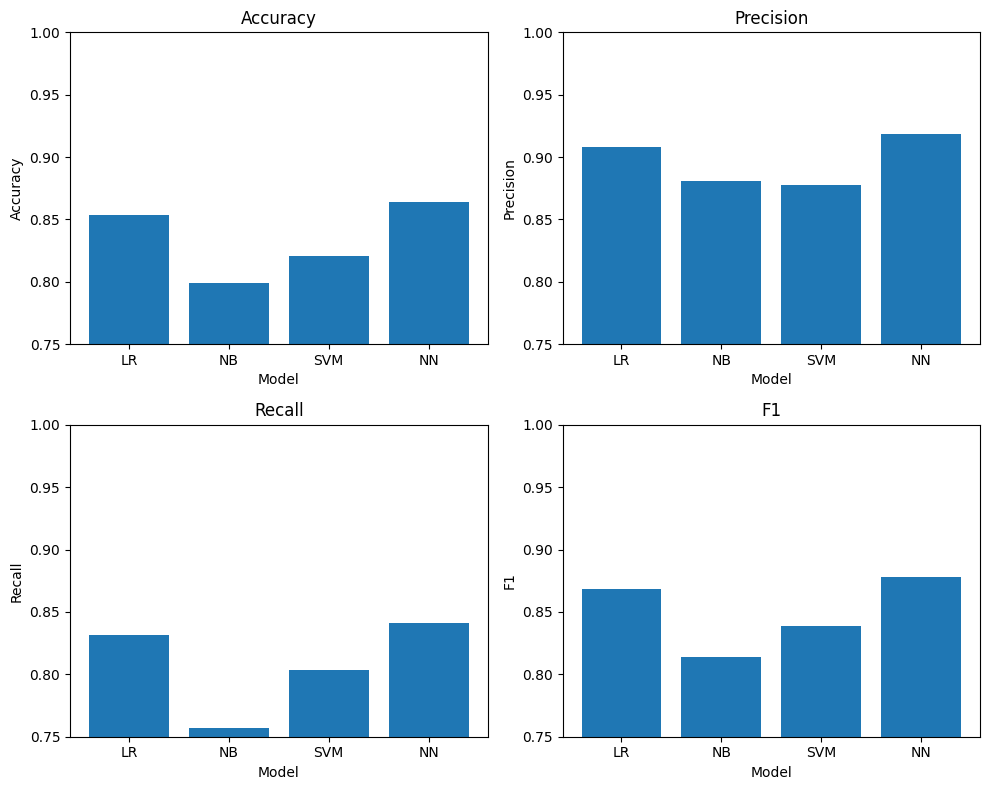

In [185]:
# Set the x-axis labels and y-axis values
models = evaluation_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

plt.figure(figsize=(10, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)  
    plt.bar(models, evaluation_df[metric])
    plt.title(metric)
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0.75, 1)

plt.tight_layout()
plt.show()


> Based on the results, the Neural Network model outperforms the other models in terms of Accuracy, Precision, Recall, F1-score and has the least False Predictions.Therefore, the Neural Network prediction model can be considered the best performing model for this classification task.

# Export Model

In [186]:
# import joblib
from tensorflow import keras

Model_NN.save('predictoNN.h5')

# # # # save model
# # joblib.dump(Model_NN, "predictorNN.joblib")
# # # joblib.dump(Model_SVM, "predictorSVM.joblib")
# # # joblib.dump(Model_LR, "predictorLR.joblib")
# # # joblib.dump(Model_GSNB, "predictorGSNB.joblib")

